In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn import metrics


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


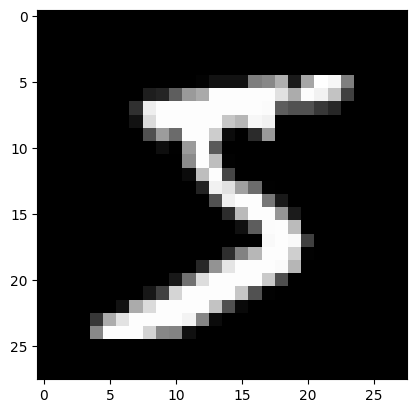

In [5]:
plt.imshow(x_train[0], cmap='gray') # imshow() function which simply displays an image.
plt.show() # cmap is responsible for mapping a specific colormap to the values found in the array that you passed as the first argument.

In [6]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [7]:
print("X_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", x_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [9]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')

In [10]:
x_test = x_test.astype('float32')
x_train /= 255 # Each image has Intensity from 0 to 255
x_test /= 255

In [11]:
num_classes = 10
y_train = np.eye(num_classes)[y_train] # Return a 2-D array with ones on the diagonal and zeros elsewhere.
y_test = np.eye(num_classes)[y_test]

In [12]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu')) #returns a sequence of another vectors of dimension 512
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [13]:
model.compile(loss='categorical_crossentropy', # for a multi-class classification problem
optimizer=RMSprop(),
metrics=['accuracy'])


In [14]:
batch_size = 128 # batch_size argument is passed to the layer to define a batch size for the inputs.
epochs = 20
history = model.fit(x_train, y_train,
batch_size=batch_size,
epochs=epochs,
verbose=1, # verbose=1 will show you an animated progress bar eg. [==========]
validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 8s 15ms/step - loss: 0.2562 - accuracy: 0.9209 - val_loss: 0.1022 - val_accuracy: 0.9680
Epoch 2/20
469/469 [==============================] - 8s 16ms/step - loss: 0.1057 - accuracy: 0.9671 - val_loss: 0.0969 - val_accuracy: 0.9706
Epoch 3/20
469/469 [==============================] - 10s 21ms/step - loss: 0.0744 - accuracy: 0.9770 - val_loss: 0.0653 - val_accuracy: 0.9802
Epoch 4/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0582 - accuracy: 0.9821 - val_loss: 0.0689 - val_accuracy: 0.9798
Epoch 5/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0458 - accuracy: 0.9857 - val_loss: 0.0678 - val_accuracy: 0.9814
Epoch 6/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0403 - accuracy: 0.9872 - val_loss: 0.0643 - val_accuracy: 0.9818
Epoch 7/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0340 - accuracy: 0.9894 - val_loss: 0.0703 - val_accuracy: 0.981

In [15]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08159882575273514
Test accuracy: 0.9847000241279602


<!-- This code snippet is an example of building a neural network model using TensorFlow and Keras to classify handwritten digits from the MNIST dataset. Let's go through it line by line:

Libraries Imported
import numpy as np: NumPy is used for numerical computations and array operations.
from tensorflow.keras.models import Sequential: Sequential is a type of model in Keras where layers are added sequentially.
from tensorflow.keras.layers import Dense, Dropout: Dense represents a fully connected layer, and Dropout is used for regularization.
from tensorflow.keras.optimizers import RMSprop: RMSprop is an optimizer algorithm.
from tensorflow.keras.datasets import mnist: This imports the MNIST dataset from Keras.
import matplotlib.pyplot as plt: Matplotlib is used for plotting.
from sklearn import metrics: Metrics from scikit-learn for evaluating the model.
Loading and Visualizing Data
mnist.load_data(): Loads the MNIST dataset into training and testing sets (x_train, y_train), (x_test, y_test).
plt.imshow(x_train[0], cmap='gray'): Displays the first image from the training data.
plt.show(): Shows the image using Matplotlib.
print(x_train[0]): Prints the pixel values of the first image.
Shape printing statements show the dimensions of the data arrays.
Data Preprocessing
x_train = x_train.reshape(60000, 784): Reshapes the training data to a 2D array (60000 samples, 784 features).
x_test = x_test.reshape(10000, 784): Reshapes the testing data similarly.
x_train = x_train.astype('float32') and x_test = x_test.astype('float32'): Converts the data type to float32.
x_train /= 255 and x_test /= 255: Normalizes the pixel values to the range [0, 1].
np.eye(num_classes)[y_train] and np.eye(num_classes)[y_test]: One-hot encodes the target labels (y_train and y_test).
Model Definition and Compilation
Sequential(): Initializes a sequential model.
model.add(Dense(512, activation='relu', input_shape=(784,))): Adds a dense layer with 512 neurons and ReLU activation as the first layer.
model.add(Dropout(0.2)): Adds a dropout layer with a dropout rate of 0.2 for regularization.
Similar layers are added for the second dense layer and output layer.
model.compile(...): Compiles the model with categorical cross-entropy loss, RMSprop optimizer, and accuracy as the metric.
Model Training
model.fit(...): Trains the model on the training data for a specified number of epochs and batch size. Validation data is provided for evaluating the model's performance during training.
Model Evaluation
score = model.evaluate(x_test, y_test, verbose=0): Evaluates the model on the test data and computes the test loss and accuracy.
The test loss and accuracy are printed out for evaluation.
Overall, this code demonstrates the complete process of loading data, preprocessing, building, training, and evaluating a neural network model for image classification using the MNIST dataset. -->

 <!-- Group B Deep Learning
 Assignment No: 2A
 Title of the Assignment: Binary classification using Deep Neural Networks Example: Classify movie
 reviews into positive" reviews and "negative" reviews, just based on the text content of the reviews.Use
 IMDB dataset
 Objective of the Assignment: Students should be able to Classify movie reviews into positive reviews
 and "negative reviews on IMDB Dataset.
 Prerequisite:
 1.
 2.
 3.
 Basic of programming language
 Concept of Classification
 Concept of Deep Neural Network--------------------------------------------------------------------------------------------------------------
Contents for Theory:
 1.
 2.
 3.
 4.
 What is Classification
 Example of Classification
 How Deep Neural Network Work on Classification
 Code Explanation with Output--------------------------------------------------------------------------------------------------------------
SNJB’s Late Sau. K.B. Jain College Of Engineering
What is Classification?
 Classification is a type of supervised learning in machine learning that involves categorizing data into
 predefined classes or categories based on a set of features or characteristics. It is used to predict the class
 of new, unseen data based on the patterns learned from the labeled training data.
 In classification, a model is trained on a labeled dataset, where each data point has a known class label.
 The model learns to associate the input features with the corresponding class labels and can then be used
 to classify new, unseen data.
 For example, we can use classification to identify whether an email is spam or not based on its content
 and metadata, to predict whether a patient has a disease based on their medical records and symptoms, or
 to classify images into different categories based on their visual features.
 Classification algorithms can vary in complexity, ranging from simple models such as decision trees and
 k-nearest neighbors to more complex models such as support vector machines and neural networks. The
 choice of algorithm depends on the nature of the data, the size of the dataset, and the desired level of
 accuracy and interpretability.
 Classification is a common task in deep neural networks, where the goal is to predict the class of an
 input based on its features. Here's an example of how classification can be performed in a deep neural
 network using the popular MNIST dataset of handwritten digits.
 The MNIST dataset contains 60,000 training images and 10,000 testing images of handwritten digits
 from 0 to 9. Each image is a grayscale 28x28 pixel image, and the task is to classify each image into one
 of the 10 classes corresponding to the 10 digits.
 We can use a convolutional neural network (CNN) to classify the MNIST dataset. A CNN is a type of
 deep neural network that is commonly used for image classification tasks.
 How Deep Neural Network Work on Classification
Deep neural networks are commonly used for classification tasks because they can automatically learn to
 extract relevant features from raw input data and map them to the correct output class.
 SNJB’s Late Sau. K.B. Jain College Of Engineering
The basic architecture of a deep neural network for classification consists of three main parts: an input
 layer, one or more hidden layers, and an output layer. The input layer receives the raw input data, which
 is usually preprocessed to a fixed size and format. The hidden layers are composed of neurons that apply
 linear transformations and nonlinear activations to the input features to extract relevant patterns and
 representations. Finally, the output layer produces the predicted class labels, usually as a probability
 distribution over the possible classes.
 During training, the deep neural network learns to adjust its weights and biases in each layer to minimize
 the difference between the predicted output and the true labels. This is typically done by optimizing a
 loss function that measures the discrepancy between the predicted and true labels, using techniques such
 as gradient descent or stochastic gradient descent.
 One of the key advantages of deep neural networks for classification is their ability to learn hierarchical
 representations of the input data. In a deep neural network with multiple hidden layers, each layer learns
 to capture more complex and abstract features than the previous layer, by building on the representations
 learned by the earlier layers. This hierarchical structure allows deep neural networks to learn highly
 discriminative features that can separate different classes of input data, even when the data is highly
 complex or noisy.
 Overall, the effectiveness of deep neural networks for classification depends on the choice of
 architecture, hyperparameters, and training procedure, as well as the quality and quantity of the training
 data. When trained properly, deep neural networks can achieve state-of-the-art performance on a wide
 range of classification tasks, from image recognition to natural language processing.
 IMDB Dataset-The IMDB dataset is a large collection of movie reviews collected from the IMDB
 website, which is a popular source of user-generated movie ratings and reviews. The dataset consists of
 50,000 movie reviews, split into 25,000 reviews for training and 25,000 reviews for testing.
 Each review is represented as a sequence of words, where each word is represented by an integer index
 based on its frequency in the dataset. The labels for each review are binary, with 0 indicating a negative
 review and 1 indicating a positive review.
 The IMDB dataset is commonly used as a benchmark for sentiment analysis and text classification tasks,
 where the goal is to classify the movie reviews as either positive or negative based on their text content.
 The dataset is challenging because the reviews are often highly subjective and can contain complex
 language and nuances of meaning, making it difficult for traditional machine learning approaches to
 accurately classify them.
 SNJB’s Late Sau. K.B. Jain College Of Engineering
Deeplearningapproaches,suchasdeepneuralnetworks,haveachievedstate-of-the-artperformanceon
 theIMDBdatasetbyautomaticallylearningtoextract relevant featuresfromtherawtextdataandmap
 themtothecorrectoutputclass.TheIMDBdataset iswidelyusedinresearchandeducationfornatural
 languageprocessingandmachinelearning,asitprovidesarichsourceof labeledtextdatafor training
 and testing deep learning models.
 Source Code and Output
#TheIMDBsentimentclassificationdatasetconsistsof50,000moviereviewsfromIMDBusersthatare
 labeled as either positive (1) or negative (0).
 #Thereviewsarepreprocessedandeachoneisencodedasasequenceofwordindexesintheformof
 integers.
 #Thewordswithinthereviewsareindexedbytheiroverall frequencywithinthedataset.Forexample,
 the integer “2” encodes the second most frequent word in the data.
 # The 50,000 reviews are split into 25,000 for training and 25,000 for testing.
 # Text Process word by word at diffrent timestamp ( You may use RNN LSTM GRU )
 # convert input text to vector reprent input text
 # DOMAIN: Digital content and entertainment industry
 #CONTEXT:Theobjectiveof thisproject is tobuilda text classificationmodel that analyses the
 customer'ssentimentsbasedontheir reviews intheIMDBdatabase.Themodelusesacomplexdeep
 learningmodel to build an embedding layer followed by a classification algorithmtoanalyse the
 sentiment of the customers.
 #DATADESCRIPTION:TheDataset of 50,000movie reviews fromIMDB, labelledbysentiment
 (positive/negative).
 #Reviews have been preprocessed, and each review is encoded as a sequence ofword indexes
 (integers).
 #Forconvenience, thewordsare indexedbytheir frequencyinthedataset,meaningthefor thathas
 index 1 is the most frequent word.
 # Use the first 20 words from each review to speed up training, using a max vocabulary size of 10,000.
 #Asaconvention, "0"doesnotstandforaspecificword,but insteadisusedtoencodeanyunknown
 word.
 #PROJECTOBJECTIVE:Builda sequentialNLPclassifierwhichcanuse input textparameters to
 determine the customer sentiments.
 import numpy as np
 import pandas as pd
 from sklearn.model_selection import train_test_split
 #loading imdb data with most frequent 10000 words
 SNJB’s Late Sau. K.B. Jain College Of Engineering
from keras.datasets import imdb
 (X_train, y_train), (X_test, y_test)= imdb.load_data(num_words=10000)#youmaytake top10,000
 word frequently used review of movies other are discarded
 #consolidatingdataforEDAExploratorydataanalysis(EDA) isusedbydatascientiststoanalyzeand
 investigate data sets and summarize their main characteristics
 data=np.concatenate((X_train,X_test), axis=0)# axis0isfirst runningverticallydownwardsacross
 rows (axis 0), axis 1 is second running horizontally across columns (axis 1),
 label = np.concatenate((y_train, y_test), axis=0)
 X_train.shape
 (25000,)
 X_test.shape
 (25000,)
 y_train.shape
 (25000,)
 y_test.shape
 (25000,)
 print("Review is ",X_train[0])# series of no convertedword to vocabulory associated with index
 print("Review is ",y_train[0])
 Reviewis [1,194,1153,194,8255,78,228,5,6,1463,4369,5012,134,26,4,715,8,118,1634,14,
 394,20,13,119,954,189,102,5,207,110,3103,21,14,69,188,8,30,23,7,4,249,126,93,4,114,
 9,2300,1523,5,647,4,116,9,35,8163,4,229,9,340,1322,4,118,9,4,130,4901,19,4,1002,5,
 89,29,952,46,37,4,455,9,45,43,38,1543,1905,398,4,1649,26,6853,5,163,11,3215,2,4,
 1153,9,194,775,7,8255,2,349,2637,148,605,2,8003,15,123,125,68,2,6853,15,349,165,
 4362,98,5,4,228,9,43,2,1157,15,299,120,5,120,174,11,220,175,136,50,9,4373,228,8255,
 5,2,656,245,2350,5,4,9837,131,152,491,18,2,32,7464,1212,14,9,6,371,78,22,625,64,
 1382, 9, 8, 168, 145, 23, 4, 1690, 15, 16, 4, 1355, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]
 Review is  0
 vocab=imdb.get_word_index()# Retrieve the word indexfile mapping words to indices
 print(vocab)
 {'fawn':34701, 'tsukino':52006, 'nunnery':52007, 'sonja':16816, 'vani':63951, 'woods':1408, 'spiders':
 16115,
 y_train
 array([1, 0, 0, ..., 0, 1, 0])
 y_test
 array([0, 1, 1, ..., 0, 0, 0])
 # Function to perform relevant sequence adding on the data
 #Nowit is time toprepareourdata.Wewillvectorizeeveryreviewandfill itwithzerossothat it
 SNJB’s Late Sau. K.B. Jain College Of Engineering
contains exactly 10000 numbers.
 # That means we fill every review that is shorter than 500 with zeros.
 #Wedothisbecausethebiggestreviewisnearlythatlongandeveryinputforourneuralnetworkneeds
 to have the same size.
 # We also transform the targets into floats.
 # sequences is name of method the review less than 10000 we perform padding overthere
 # binary vectorization code:
 # VECTORIZE as one cannot feed integers into a NN
 # Encoding the integer sequences into a binary matrix - one hot encoder basically
 #Fromintegersrepresentingwords,atvariouslengths-toanormalizedonehotencodedtensor(matrix)
 of 10k columns
 defvectorize(sequences,dimension=10000): #Wewillvectorizeeveryreviewandfill itwithzeros
 so that it contains exactly 10,000 numbers.
 # Create an all-zero matrix of shape (len(sequences),dimension)
 results = np.zeros((len(sequences), dimension))
 for i, sequenceinenumerate(sequences):
 results[i, sequence] =1
 return results
 # Now we split our data into a training and a testing set.
 # The training set will contain  reviews and the testing set
 # # Set a VALIDATION set
 test_x = data[:10000]
 test_y = label[:10000]
 train_x = data[10000:]
 train_y = label[10000:]
 test_x.shape
 (10000,)
 test_y.shape
 (10000,)
 train_x.shape
 (40000,)
 train_y.shape
 (40000,)
 print("Categories:", np.unique(label))
 print("Number of unique words:",len(np.unique(np.hstack(data))))
 SNJB’s Late Sau. K.B. Jain College Of Engineering
# The hstack() function is used to stack arrays in sequence horizontally (column wise).
 Categories: [0 1]
 Number of unique words: 9998
 length = [len(i)foriindata]
 print("Average Review length:", np.mean(length))
 print("Standard Deviation:",round(np.std(length)))
 #Thewholedataset contains9998uniquewordsandtheaveragereviewlengthis234words,witha
 standard deviation of 173 words.
 Average Review length: 234.75892
 Standard Deviation: 173
 # If you look at the data you will realize it has been already pre-processed.
 # All words have been mapped to integers and the integers represent the words sorted by their frequency.
 # This is very common in text analysis to represent a dataset like this.
 # So 4 represents the 4th most used word,
 # 5 the 5th most used word and so on...
 # The integer 1 is reserved for the start marker,
 # the integer 2 for an unknown word and 0 for padding.
 # Let's look at a single training example:
 print("Label:", label[0])
 Label: 1
 print("Label:", label[1])
 Label: 0
 print(data[0])
 # Retrieves a dict mapping words to their index in the IMDB dataset.
 index = imdb.get_word_index() # word to index
 #Create invertedindexfromadictionarywithdocument idsaskeysandalistof termsasvaluesfor
 each document
 reverse_index =dict([(value, key)for(key, value)inindex.items()])# id to word
 decoded =" ".join( [reverse_index.get(i -3,"#")foriindata[0]] )
 #Theindicesareoffsetby3because0,1and2arereservedindicesfor"padding","startofsequence"
 and "unknown".
 print(decoded)
 #thisfilmwasjustbrilliantcastinglocationscenerystorydirectioneveryone'sreallysuitedthepartthey
 SNJB’s Late Sau. K.B. Jain College Of Engineering
playedandyoucouldjust imaginebeingthererobert#isanamazingactorandnowthesamebeing
 director # father came fromthe same scottish islandasmyself so i loved the fact therewasareal
 connection with this film the witty remarks throughout the film
 #Adding sequence to data
 #Vectorizationis theprocessofconvertingtextualdataintonumericalvectorsandisaprocessthat is
 usually applied once the text is cleaned.
 data = vectorize(data)
 label = np.array(label).astype("float32")
 labelDF=pd.DataFrame({'label':label})
 sns.countplot(x='label', data=labelDF)
 # Creating train and test data set
 fromsklearn.model_selectionimporttrain_test_split
 X_train, X_test, y_train, y_test = train_test_split(data,label, test_size=0.20, random_state=1)
 X_train.shape
 (40000, 10000)
 X_test.shape
 (10000, 10000)
 # Let's create sequential model
 fromkeras.utilsimportto_categorical
 fromkerasimportmodels
 fromkerasimportlayers
 model = models.Sequential()
 # Input - Layer
 #Notethatweset theinput-shapeto10,000at theinput-layerbecauseourreviewsare10,000integers
 long.
 # The input-layer takes 10,000 as input and outputs it with a shape of 50.
 model.add(layers.Dense(50, activation ="relu", input_shape=(10000,)))
 SNJB’s Late Sau. K.B. Jain College Of Engineering
# Hidden - Layers
 #Pleasenoteyoushouldalwaysuseadropoutratebetween20%and50%.#hereinourcase0.3means
 30% dropout we are using dropout to prevent overfitting.
 #Bytheway, ifyouwantyoucanbuildasentimentanalysiswithoutLSTMs, thenyousimplyneedto
 replace it by a flatten layer:
 model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
 model.add(layers.Dense(50, activation ="relu"))
 model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
 model.add(layers.Dense(50, activation ="relu"))
 # Output- Layer
 model.add(layers.Dense(1, activation ="sigmoid"))
 model.summary()
 Model: "sequential"
 _________________________________________________________________
 Layer (type)                Output Shape              Param #
 =================================================================
 dense (Dense)               (None, 50)                500050
 dropout (Dropout)           (None, 50)                0
 dense_1 (Dense)             (None, 50)                2550
 dropout_1 (Dropout)         (None, 50)                0
 dense_2 (Dense)             (None, 50)                2550
 dense_3 (Dense)             (None, 1)                 51
 =================================================================
 Total params: 505,201
 Trainable params: 505,201
 Non-trainable params: 0
 #For early stopping
 # Stop training when a monitored metric has stopped improving.
 # monitor: Quantity to be monitored.
 # patience: Number of epochs with no improvement after which training will be
 stopped.
 import tensorflow as tf
 callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
 # We use the “adam” optimizer, an algorithm that changes the weights and biases
 during training.
 # We also choose binary-crossentropy as loss (because we deal with binary
 SNJB’s Late Sau. K.B. Jain College Of Engineering
classification) and accuracy as our evaluation metric.
 model.compile(
 optimizer = "adam",
 loss = "binary_crossentropy",
 metrics = ["accuracy"]
 )
 from sklearn.model_selection import train_test_split
 results = model.fit(
 X_train, y_train,
 epochs= 2,
 batch_size = 500,
 validation_data = (X_test, y_test),
 callbacks=[callback]
 )
 # Let's check mean accuracy of our model
 print(np.mean(results.history["val_accuracy"]))
 # Evaluate the model
 score = model.evaluate(X_test, y_test, batch_size=500)
 print('Test loss:', score[0])
 print('Test accuracy:', score[1])
 20/20 [==============================]-1s 24ms/step-loss: 0.2511-accuracy:
 0.8986
 Test loss: 0.25108325481414795
 Test accuracy: 0.8985999822616577
 #Let's plot training history of our model.
 # list all data in history
 print(results.history.keys())
 # summarize history for accuracy
 plt.plot(results.history['accuracy'])
 plt.plot(results.history['val_accuracy'])
 plt.title('model accuracy')
 plt.ylabel('accuracy')
 plt.xlabel('epoch')
 plt.legend(['train', 'test'], loc='upper left')
 plt.show()
 # summarize history for loss
 plt.plot(results.history['loss'])
 plt.plot(results.history['val_loss'])
 plt.title('model loss')
 plt.ylabel('loss')
 SNJB’s Late Sau. K.B. Jain College Of Engineering
plt.xlabel('epoch')
 plt.legend(['train', 'test'], loc='upper left')
 plt.show()
 Conclusion- In this way we can Classify the MovieReviews by using DNN.
 Assignment Question
 1. What is Binary Classification?
 2. What is binary Cross Entropy?
 3. What is Validation Split?
 4. What  is the Epoch Cycle?
 5. What is Adam Optimizer?
 SNJB’s Late Sau. K.B. Jain College Of Engineerin -->